# Load Data

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
df=pd.read_csv("Ecommerce Customers",sep=',')

In [13]:
df=df.rename(columns={"Avg. Session Length":"Avg_Session_Length","Time on App":"Time_on_App","Time on Website":"Time_on_Website","Length of Membership":"Length_of_Membership","Yearly Amount Spent":"Yearly_Amount_Spent"})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg_Session_Length    500 non-null    float64
 4   Time_on_App           500 non-null    float64
 5   Time_on_Website       500 non-null    float64
 6   Length_of_Membership  500 non-null    float64
 7   Yearly_Amount_Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Exploratory Data Analysis

In [15]:
df.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


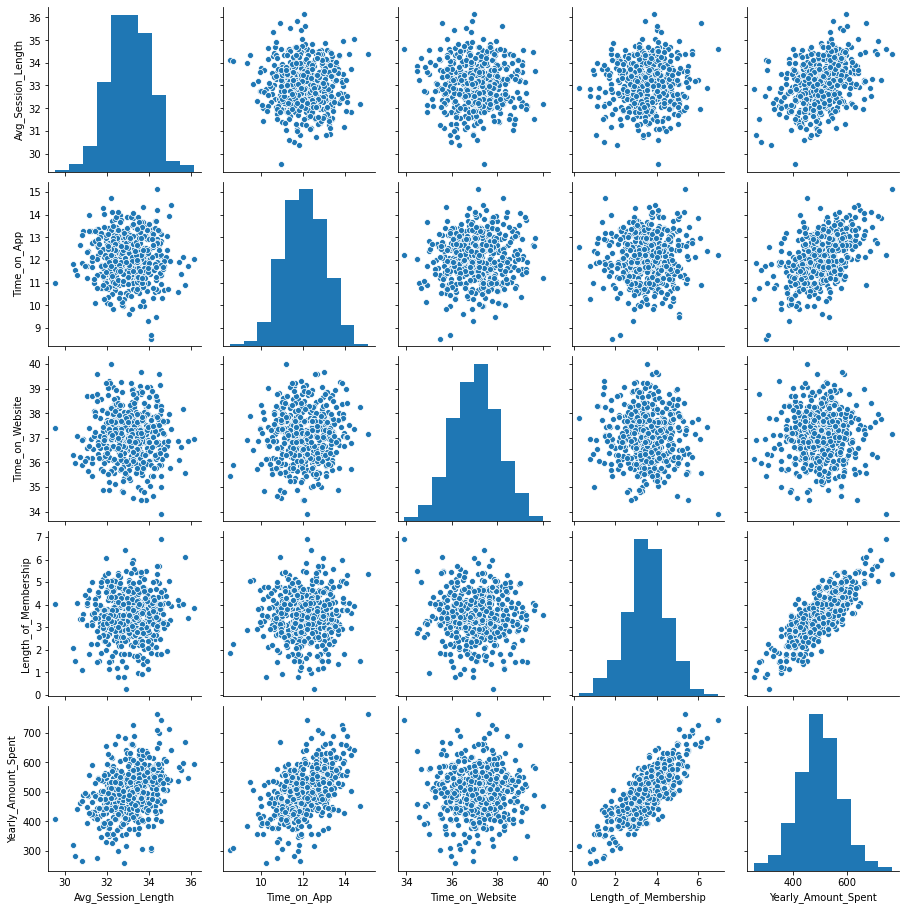

In [18]:
sns.pairplot(df)

In [21]:
corrmat=df.corr()

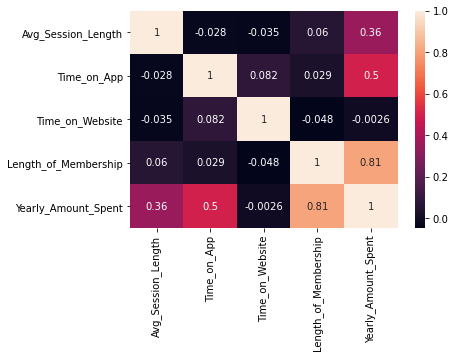

In [27]:
sns.heatmap(corrmat,annot=True)

###### Note: Only Length_of_Membership is corelated with Yearly_Amount_Spent

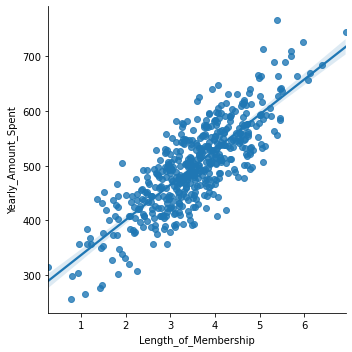

In [32]:
sns.lmplot(x='Length_of_Membership',y='Yearly_Amount_Spent',data=df)

###### Check the R2 score including all the dependent variables


In [44]:
x=df.drop(['Yearly_Amount_Spent',"Email","Address","Avatar"],axis=1)

In [65]:
y=df.Yearly_Amount_Spent

# Train-Test-Split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Training the Model

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [70]:
coefficients=linreg.coef_
coefficients

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

# Coefficients

In [71]:
c=pd.DataFrame(data=linreg.coef_,index=x.columns,columns=["Coefficients"])
c

,Coefficients
Avg_Session_Length,25.724256
Time_on_App,38.597135
Time_on_Website,0.459148
Length_of_Membership,61.674732


###### Interpreting the coefficients:

#a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
#a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
#a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
#a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

# Predicting Test Data

In [73]:
y_predict=linreg.predict(x_test)

In [74]:
Residuals=y_predict-y_test

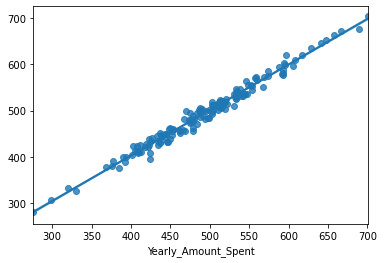

In [83]:
sns.regplot(y_test,y_predict)

# Residual Analysis

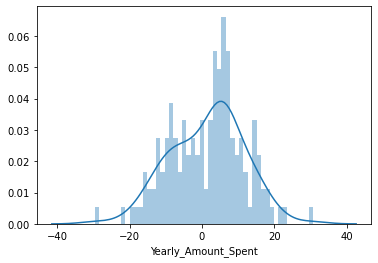

In [79]:
sns.distplot(Residuals,bins=50)

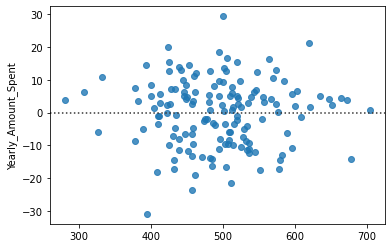

In [89]:
sns.residplot(y_predict,Residuals)

# Model Evaluation

In [84]:
from sklearn.metrics import mean_squared_error,r2_score

In [85]:
mean_squared_error=mean_squared_error(y_test,y_predict)
r2_score=r2_score(y_test,y_predict)

In [86]:
r2_score

0.9808757641125855

In [87]:
mean_squared_error

103.91554136503333